In [18]:
#import tensorflow and keras

import tensorflow as tf
from tensorflow import keras
print(tf.__version__)

2.11.0


In [19]:
#Initialization

EPOCHS = 50
BATCH_SIZE = 32
IMAGE_HEIGHT = 128
IMAGE_WIDTH = 128
IMAGE_CHANNELS = 3
IMAGE_SHAPE=(IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS)
NUM_CLASSES=5
AUTOTUNE = tf.data.AUTOTUNE

In [20]:
#Import and split for training

train_ds = keras.utils.image_dataset_from_directory(
  "C:\\Users\\bitut\\Paddy\\train",
  validation_split=0.2,
  subset="training",
  seed=123,
  batch_size=BATCH_SIZE,
)

val_ds = keras.utils.image_dataset_from_directory(
  "C:\\Users\\bitut\\Paddy\\valid",
  validation_split=0.2,
  subset="validation",
  seed=123,
  batch_size=BATCH_SIZE,
)

Found 445 files belonging to 4 classes.
Using 356 files for training.
Found 445 files belonging to 4 classes.
Using 89 files for validation.


['blast', 'blb', 'blight', 'brownspot']


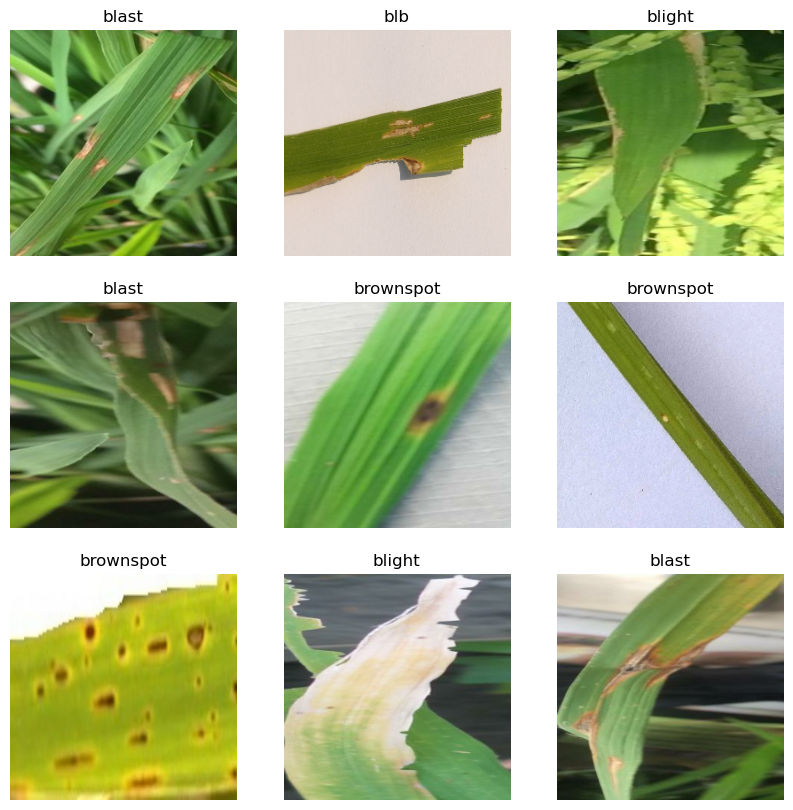

In [21]:
#Preview data

class_names = train_ds.class_names
print(class_names)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
    
    

In [22]:
#Image Preprocessing

preprocessing = keras.Sequential([
    keras.layers.Resizing(IMAGE_HEIGHT, IMAGE_WIDTH),
    keras.layers.Rescaling(1./255),
])

In [23]:
#Data augmentation

data_augmentation = keras.Sequential([
    keras.layers.RandomFlip("horizontal_and_vertical"),
    keras.layers.RandomRotation(0.2),
    keras.layers.RandomTranslation(0.2, 0.2),
    keras.layers.RandomZoom(0.2),
    keras.layers.RandomBrightness(0.4),
    keras.layers.RandomContrast(0.4),
])

train_ds.map(lambda x, y: (data_augmentation(x, training=True), y), num_parallel_calls=AUTOTUNE)

<ParallelMapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [24]:
#CNN layers

model = keras.models.Sequential([
    keras.layers.Input(shape=(None, None, 3)),

    preprocessing,

    keras.layers.Conv2D(32, 3, padding="same", activation="relu"),
    # keras.layers.BatchNormalization(momentum=0.87),
    keras.layers.MaxPooling2D(),

    keras.layers.Conv2D(64, 3, padding="same", activation="relu"),
    # keras.layers.BatchNormalization(momentum=0.87),
    keras.layers.MaxPooling2D(),

    keras.layers.Conv2D(128, 3, padding="same", activation="relu"),
    # keras.layers.BatchNormalization(momentum=0.87),
    keras.layers.MaxPooling2D(),

    keras.layers.GlobalAveragePooling2D(),

    keras.layers.Dropout(0.15),

    keras.layers.Dense(NUM_CLASSES, activation="softmax")
])


model.compile(
    optimizer=keras.optimizers.Adam(),
    loss=keras.losses.SparseCategoricalCrossentropy(),
    metrics=[keras.metrics.SparseCategoricalAccuracy()],
)

model.summary(
    expand_nested=True,
)

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_6 (Sequential)   (None, 128, 128, 3)       0         
|¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯|
| resizing_2 (Resizing)     (None, 128, 128, 3)       0         |
|                                                               |
| rescaling_2 (Rescaling)   (None, 128, 128, 3)       0         |
¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯¯
 conv2d_6 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 64, 64, 64)        18496     
                                                      

In [25]:
#Prefetch data

train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
#Training

earlystop_loss = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=25, restore_best_weights=True)

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=EPOCHS,
    callbacks=[earlystop_loss],
)

Epoch 1/50
12/12 [==============================] - 6s 361ms/step - loss: 1.4098 - sparse_categorical_accuracy: 0.3174 - val_loss: 1.3223 - val_sparse_categorical_accuracy: 0.4045
Epoch 2/50
12/12 [==============================] - 4s 329ms/step - loss: 1.3452 - sparse_categorical_accuracy: 0.3624 - val_loss: 1.2698 - val_sparse_categorical_accuracy: 0.5169
Epoch 3/50
12/12 [==============================] - 4s 320ms/step - loss: 1.2756 - sparse_categorical_accuracy: 0.4045 - val_loss: 1.2202 - val_sparse_categorical_accuracy: 0.5056
Epoch 4/50
12/12 [==============================] - 4s 322ms/step - loss: 1.2528 - sparse_categorical_accuracy: 0.4494 - val_loss: 1.1762 - val_sparse_categorical_accuracy: 0.5393
Epoch 5/50
12/12 [==============================] - 4s 320ms/step - loss: 1.1950 - sparse_categorical_accuracy: 0.4944 - val_loss: 1.1159 - val_sparse_categorical_accuracy: 0.5618
Epoch 6/50
12/12 [==============================] - 4s 303ms/step - loss: 1.1681 - sparse_categorica

In [13]:
#Learning curve graph

from matplotlib import pyplot as plt

print("Epochs run:", len(history.history["loss"]))

acc = history.history["sparse_categorical_accuracy"]
val_acc = history.history["val_sparse_categorical_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(acc) + 1)

Epochs run: 50


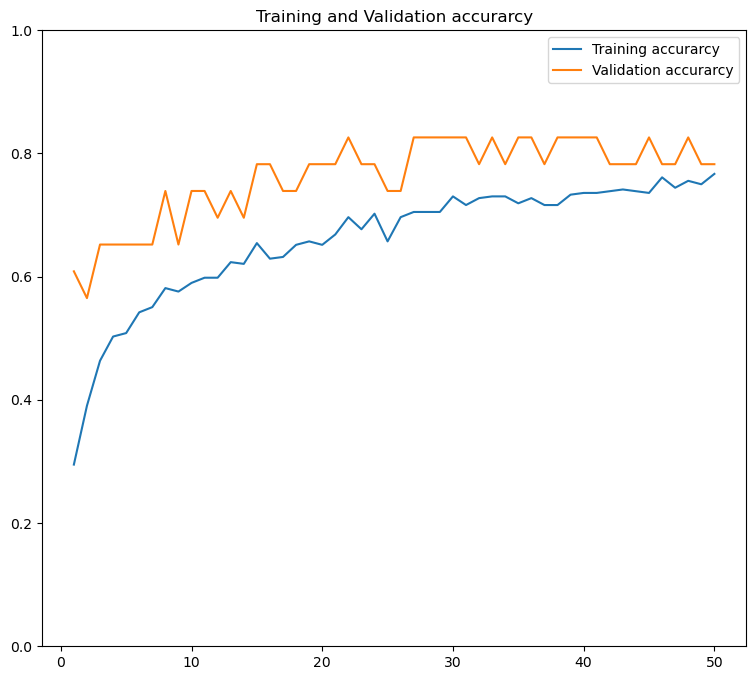

In [14]:
# Train and validation accuracy
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.ylim((0, 1))
plt.plot(epochs, acc, label="Training accurarcy")
plt.plot(epochs, val_acc, label="Validation accurarcy")
plt.title("Training and Validation accurarcy")
plt.legend()

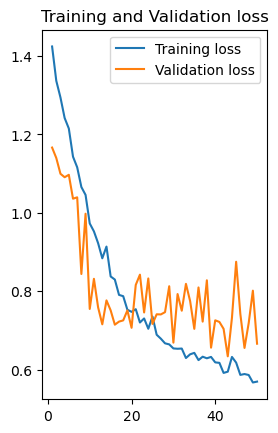

In [15]:
# Train and validation loss
plt.subplot(1, 2, 2)

plt.plot(epochs, loss, label="Training loss")
plt.plot(epochs, val_loss, label="Validation loss")
plt.title("Training and Validation loss")
plt.legend()
plt.show()

In [16]:
#Model accuracy

test_ds = keras.utils.image_dataset_from_directory("C:\\Users\\bitut\\Paddy\\test")

results = model.evaluate(test_ds, verbose=0)

print("Test accuracy:", results[1]*100)
print("Test loss:", results[0]*100)

Found 134 files belonging to 4 classes.
Test accuracy: 63.43283653259277
Test loss: 97.71435856819153
